avgAnnCount                  0
avgDeathsPerYear             0
incidenceRate                0
medIncome                    0
povertyPercent               0
MedianAgeMale                0
MedianAgeFemale              0
AvgHouseholdSize             0
PercentMarried               0
PctNoHS18_24                 0
PctHS18_24                   0
PctBachDeg18_24              0
PctHS25_Over                 0
PctBachDeg25_Over            0
PctEmployed16_Over         152
PctUnemployed16_Over         0
PctPrivateCoverage           0
PctPrivateCoverageAlone    609
PctEmpPrivCoverage           0
PctPublicCoverage            0
PctPublicCoverageAlone       0
PctWhite                     0
PctBlack                     0
PctAsian                     0
PctOtherRace                 0
PctMarriedHouseholds         0
dtype: int64

Cross-Validation Scores: [-0.09958513 -0.06938158 -0.05212413 -0.04968595 -0.07705493 -0.15910058
 -0.03229779 -0.01025019 -0.01015009 -0.01299324]

Average Cross-Validation Score:

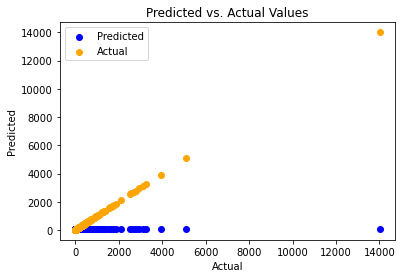

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score
import math

# Load data from the CSV file
data = pd.read_csv('cancer_reg_updated.csv')

# Checking for missing values
print(data.isna().sum())

# Input missing values with the mean
data.fillna(data.mean(), inplace=True)

# Separating features and target variable
X = data.drop(['avgDeathsPerYear'], axis=1)
y = data['avgDeathsPerYear']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create SVM regressor
svm = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=.1)

k = 10
cv_scores = cross_val_score(svm, X, y, cv=k)

# Fit the regressor to the training data
svm.fit(X_train, y_train)

# Predict the target values for the test data
y_pred = svm.predict(X_test)

# Output for Cross Validation 
print("\nCross-Validation Scores:", cv_scores)
print("\nAverage Cross-Validation Score:", cv_scores.mean())

# Outputs for the mean squared error, RMSE, and R-squared score
mse = mean_squared_error(y_test, y_pred)
rmse = math.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Mean squared error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared score:", r2)

# Scatterplot for the predicted vs. actual values
plt.scatter(y_test, y_pred, color='blue', label='Predicted')
plt.scatter(y_test, y_test, color='orange', label='Actual')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Predicted vs. Actual Values')
plt.legend()
plt.show()
